<a href="https://colab.research.google.com/github/rodsei/pattern-recognition/blob/main/RENEAR_Atividade_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparação do perceptron criterion com hinge-loss

Considere um dataset de 2 dimensões em que todos os pontos com x1 > x2 pertencem à classe positiva, e todos os pontos com x1 <= x2 pertencem à classe negativa. Assim, o separador entre as duas classes é um hiperplano linear definido por x1 - x2 = 0. Agora crie um dataset com 20 pontos aleatoriamente gerados dentro de uma unidade quadrada no quadrante positivo. Rotule cada ponto dependendo se x1 é maior do que x2, ou não.

1. Implemente o algoritmo perceptron sem regularização. Treino-o com os 20 pontos gerados, e teste sua acurácia com 1000 pontos gerados aleatoriamente dentro da unidade quadrada. Gere os pontos de teste usando o mesmo procedimento usado para gerar os dados de treino.

2. Mude o critério do perceptron para hinge-loss na sua implementação. Repita o treino e a estimativa de acurácia com os mesmo pontos do item anterior.
3. Em qual caso você obteve a melhor acurácia, e por quê?

4. Em qual caso você acha que a classificação dos mesmos 1000 pontos de teste não será significativamente diferente se o algoritmo for treinado com 20 pontos diferentes, também gerados aleatoriamente?

## Implementing Perceptrons

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

### Squared Error Perceptron

In [ ]:
class SquaredErrorPerceptron(BaseEstimator, ClassifierMixin):

  # Perceptron using a Squared Error Cost Function
  def __init__(self):
    self.w = None
    self.activation = lambda a: (a>=0)*2-1
    self.alpha = .1
    
  def fit(self, X, y):
    self.cost_convergence = []
    self.w = np.random.uniform(-1, 1, size=2)
    while(True):
      ypred = self.predict(X)
      error = y - ypred
      cost = np.sum(error**2)
      self.cost_convergence.append(cost)
      self.w = self.w + self.alpha * np.matmul(error, X)
      if cost == 0:
        break
    
  def predict(self, X):
    a = np.matmul(X, self.w)
    ypred = self.activation(a)
    return ypred

  def score(self, X, y):
    ypred = self.predict(X)
    accuracy = sum(y == ypred)/len(y)
    return accuracy

### Hinge Loss Percepron

In [ ]:
class HingeLoss():
    @staticmethod
    def error(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def cost(y, ypred):
        return np.sum(1 - HingeLoss.error(y, ypred))
    @staticmethod
    def gradient(y, ypred, X):
        margin = HingeLoss.error(y, ypred) < 1
        return np.matmul(y[margin], X[margin])

class HingeLossPerceptron(BaseEstimator, ClassifierMixin):

  # Perceptron using Hinge Loss Cost Function
  def __init__(self):
    self.w = None
    self.activation = lambda a: (a>=0)*2-1
    self.alpha = .1
    self.maxiter = 100
    self.costFunction = HingeLoss()

  def fit(self, X, y):
    self.cost_convergence = []
    self.w = np.random.uniform(-1, 1, size=2)
    for _ in range(self.maxiter):
      ypred = self.predict(X)
      cost = self.costFunction.cost(y, ypred)
      self.cost_convergence.append(cost)
      self.w = self.w + self.alpha * self.costFunction.gradient(y, ypred, X)
      if cost==0:
        break

  def predict(self, X):
    a = np.matmul(X, self.w)
    ypred = self.activation(a)
    return ypred

  def score(self, X, y):
    ypred = self.predict(X)
    accuracy = sum(y == ypred)/len(y)
    return accuracy  

## Defining a sample dataset

In [ ]:
import numpy as np

dataset_size = {'train': 20,'test': 1000}

# Generate sample values for 2 dimensions
X_train = np.random.uniform(size=[dataset_size['train'],2])
X_test = np.random.uniform(size=[dataset_size['test'],2])

# Transforma valores boolean em numérico com a Distribuição Normal
y_train = np.array(X_train[:,0] > X_train[:,1], dtype=int)*2-1 
y_test = np.array(X_test[:,0] > X_test[:,1], dtype=int)*2-1

X_train, y_train

(array([[0.31936143, 0.32375135],
        [0.06203572, 0.38515724],
        [0.80263327, 0.68964645],
        [0.02085955, 0.65205259],
        [0.28555191, 0.46390323],
        [0.60787224, 0.9581637 ],
        [0.65036726, 0.59473381],
        [0.47420413, 0.75596996],
        [0.26455301, 0.84406156],
        [0.24571344, 0.07060741],
        [0.96724905, 0.48906147],
        [0.57541528, 0.92535205],
        [0.15873951, 0.8191533 ],
        [0.95336824, 0.57757722],
        [0.71390832, 0.43340126],
        [0.83335969, 0.92279341],
        [0.516335  , 0.717728  ],
        [0.26077128, 0.71999114],
        [0.12555209, 0.29480586],
        [0.66859889, 0.80813031]]),
 array([-1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,
        -1, -1, -1]))

### Visualizing Dataset

In [ ]:
from matplotlib import pyplot as plt

def plotData(X, y):
  for k in set(y):
    plt.plot(X[:,0][y==k], X[:,1][y==k],'o', alpha=0.5)

def plotVector(hyperplan):
  origin = [0,0]
  plt.arrow(*origin, *hyperplan, color='k')
  
def perpendicular(vector):
  view = np.array(vector[::-1])
  view[0] *= -1
  return view

def plotAll(X, y, vector):
  plotData(X, y)
  hyperplan = perpendicular(vector) 
  plotVector(hyperplan)
  plt.show()

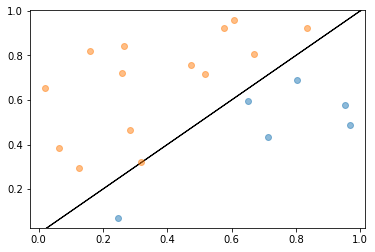

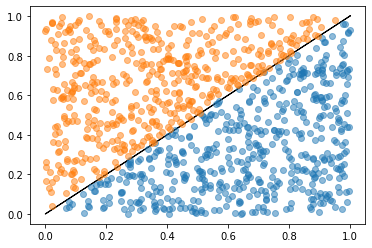

In [ ]:
default_vector = [1, -1]
plotAll(X_train, y_train, default_vector)
plotAll(X_test, y_test, default_vector) 

## Comparing Perceptron implementations and criterions

### Squared Error Perceptron

Accuracy: 0.965
Weights: [ 1.23159591 -1.33924391]
Convergence: 12 iter
  -> [8, 56, 24, 24, 16, 16, 16, 16, 16, 8, 4, 0]


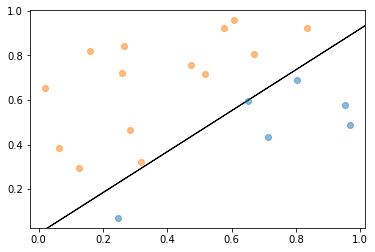

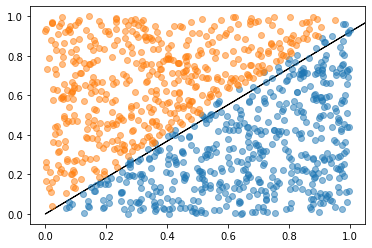

In [ ]:
squared_error_clf = SquaredErrorPerceptron()
squared_error_clf.fit(X_train, y_train)
print(f"Accuracy: {squared_error_clf.score(X_test,y_test)}")
print(f"Weights: {squared_error_clf.w}")
print(f"Convergence: {len(squared_error_clf.cost_convergence)} iter\n  -> {squared_error_clf.cost_convergence}")

plotAll(X_train, y_train, squared_error_clf.w)
plotAll(X_test, y_test, squared_error_clf.w)

### Hinge Loss Perceptron

Accuracy: 0.994
Weights: [ 0.59553248 -0.60146733]
Convergence: 12 iter
  -> [38, 18, 24, 36, 12, 12, 28, 12, 8, 8, 4, 0]


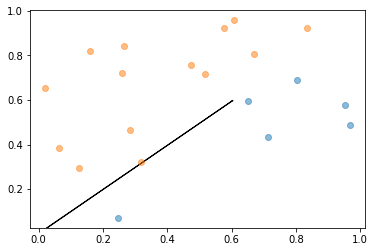

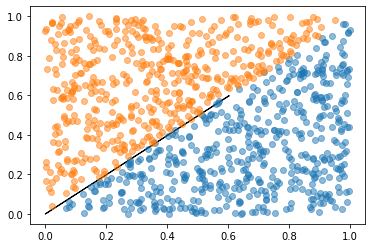

In [ ]:
hinge_loss_clf = HingeLossPerceptron()
hinge_loss_clf.fit(X_train, y_train)
print(f"Accuracy: {hinge_loss_clf.score(X_test, y_test)}")
print(f"Weights: {hinge_loss_clf.w}")
print(f"Convergence: {len(hinge_loss_clf.cost_convergence)} iter\n  -> {hinge_loss_clf.cost_convergence}")

plotAll(X_train, y_train, hinge_loss_clf.w)
plotAll(X_test, y_test, hinge_loss_clf.w) 

### Comparing multiple execution results

In [ ]:
def plotMultipleExecutionResults(X, y, simulations, X_tr, y_tr):
  plt.figure(figsize=(15,5))

  squared_error_results = []
  hinge_loss_results = []
  
  sqrt_clf = SquaredErrorPerceptron()
  hl_clf = HingeLossPerceptron()

  for _ in range(simulations):
    # Refit classifiers
    sqrt_clf.fit(X_tr, y_tr)
    hl_clf.fit(X_tr, y_tr)
    # Rescore classifiers
    squared_error_results.append(sqrt_clf.score(X, y))
    hinge_loss_results.append(hl_clf.score(X, y))

  runs = range(simulations)

  print(f"Runs: {len(runs)}")
  print(f"Accuracy Results")
  print(f"  -> Squared: {squared_error_results}")
  print(f"  -> Hinge:   {hinge_loss_results}")

  # Plot Simulation Results
  plt.plot(runs, squared_error_results, marker='o', label="Squared Error Score", color="r")
  plt.plot(runs, hinge_loss_results, marker='o', label="Hinge Loss Score", color="b") 

  #Plot Means
  plt.plot(runs,[np.mean(squared_error_results)]*len(runs), label='Squared Error Score Mean', linestyle='--', color="r")
  plt.plot(runs,[np.mean(hinge_loss_results)]*len(runs), label='Hinge Loss Score Mean', linestyle='--', color="b")

  plt.legend(labels=["Squared Error Perceptron", "Hinge Loss Perceptron"])
  plt.title(f"Comparing multiple execution results")
  plt.ylabel("Results")
  plt.xlabel("Simulations")
  plt.xticks(runs)
  plt.grid()
  plt.show()
  return np.mean(squared_error_results), np.mean(hinge_loss_results)

Runs: 50
Accuracy Results
  -> Squared: [0.972, 0.993, 0.971, 0.965, 0.971, 0.979, 0.982, 0.978, 0.979, 0.966, 0.991, 0.979, 0.963, 0.989, 0.967, 0.982, 0.982, 0.983, 0.972, 0.994, 0.968, 0.966, 0.969, 0.963, 0.983, 0.969, 0.994, 0.971, 0.974, 0.98, 0.983, 0.972, 0.983, 0.971, 0.976, 0.993, 0.965, 0.981, 0.991, 0.963, 0.983, 0.978, 0.963, 0.963, 0.993, 0.981, 0.981, 0.971, 0.972, 0.995]
  -> Hinge:   [0.991, 0.979, 0.979, 0.988, 0.972, 0.996, 0.979, 0.992, 0.976, 0.971, 0.972, 0.984, 0.982, 0.998, 0.963, 0.993, 0.971, 0.98, 0.993, 0.984, 0.984, 0.972, 0.972, 0.994, 0.993, 0.971, 0.991, 0.99, 0.978, 0.998, 0.984, 0.998, 0.963, 0.991, 0.995, 1.0, 0.998, 0.998, 0.993, 0.984, 0.998, 0.993, 0.976, 0.995, 0.971, 0.982, 0.995, 0.991, 0.992, 0.979]


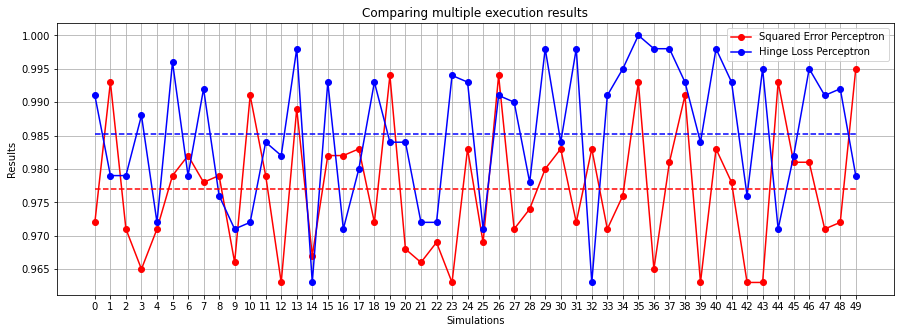

Média dos resultados:
 Squared Error scores: 97.70599999999999
.   Hinge Loss scores: 98.524


In [ ]:
mean_sqr, mean_hl = plotMultipleExecutionResults(X_test, y_test, 50, X_train, y_train)
print("Média dos resultados:")
print(f" Squared Error scores: {mean_sqr*100}")
print(f".   Hinge Loss scores: {mean_hl*100}")

## Evaluating with a new training dataset

### Visualizing New Dataset

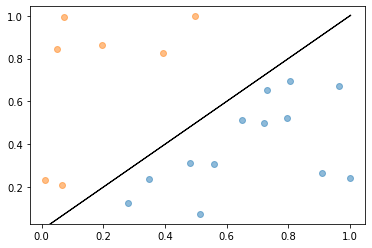

In [ ]:
# Generate sample values for 2 dimensions
X_new = np.random.uniform(size=[dataset_size['train'],2])
y_new = np.array(X_new[:,0] > X_new[:,1], dtype=int)*2-1 

plotAll(X_new, y_new, default_vector)

### Squared Error Perceptron

Accuracy: 0.85
Weights: [ 1.26364597 -0.88766426]
Convergence: 3 iter
  -> [52, 28, 0]


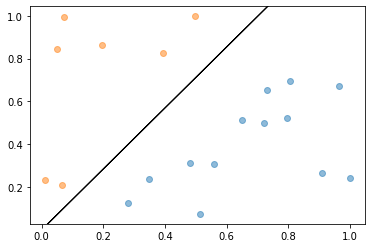

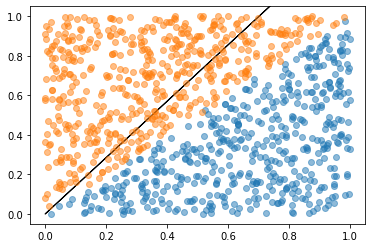

In [ ]:
new_sqr_clf = SquaredErrorPerceptron()
new_sqr_clf.fit(X_new, y_new)
print(f"Accuracy: {new_sqr_clf.score(X_test,y_test)}")
print(f"Weights: {new_sqr_clf.w}")
print(f"Convergence: {len(new_sqr_clf.cost_convergence)} iter\n  -> {new_sqr_clf.cost_convergence}")

plotAll(X_new, y_new, new_sqr_clf.w)
plotAll(X_test, y_test, new_sqr_clf.w) 

### Hinge Loss Perceptron

Accuracy: 0.888
Weights: [ 0.68526684 -0.52512831]
Convergence: 2 iter
  -> [4, 0]


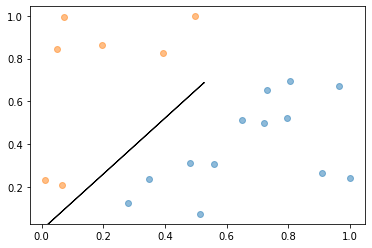

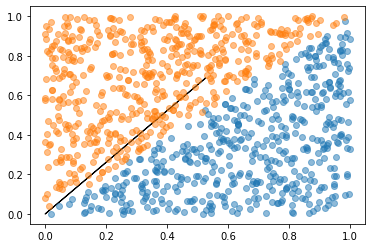

In [ ]:
new_hl_clf = HingeLossPerceptron()
new_hl_clf.fit(X_new, y_new)
print(f"Accuracy: {new_hl_clf.score(X_test, y_test)}")
print(f"Weights: {new_hl_clf.w}")
print(f"Convergence: {len(new_hl_clf.cost_convergence)} iter\n  -> {new_hl_clf.cost_convergence}")

plotAll(X_new, y_new, new_hl_clf.w)
plotAll(X_test, y_test, new_hl_clf.w) 

### Comparing multiple execution results

Runs: 50
Convergences
  -> Squared: [0.836, 0.769, 0.925, 0.748, 0.95, 0.85, 0.873, 0.801, 0.958, 0.941, 0.82, 0.87, 0.807, 0.735, 0.761, 0.815, 0.807, 0.762, 0.819, 0.82, 0.869, 0.973, 0.762, 0.805, 0.798, 0.966, 0.964, 0.866, 0.962, 0.913, 0.959, 0.898, 0.821, 0.988, 0.95, 0.94, 0.848, 0.955, 0.826, 0.867, 0.845, 0.747, 0.799, 0.845, 0.879, 0.799, 0.88, 0.95, 0.988, 0.821]
  -> Hinge:   [0.93, 0.842, 0.985, 0.879, 0.967, 0.858, 0.797, 0.867, 0.903, 0.864, 0.99, 0.745, 0.838, 0.836, 0.953, 0.889, 0.872, 0.944, 0.996, 0.893, 0.797, 0.867, 0.883, 0.994, 0.763, 0.804, 0.797, 0.75, 0.942, 0.94, 0.841, 0.997, 0.862, 0.949, 0.815, 0.889, 0.946, 0.858, 0.827, 0.851, 0.903, 0.966, 0.992, 0.867, 0.918, 0.848, 0.764, 0.845, 0.921, 0.765]


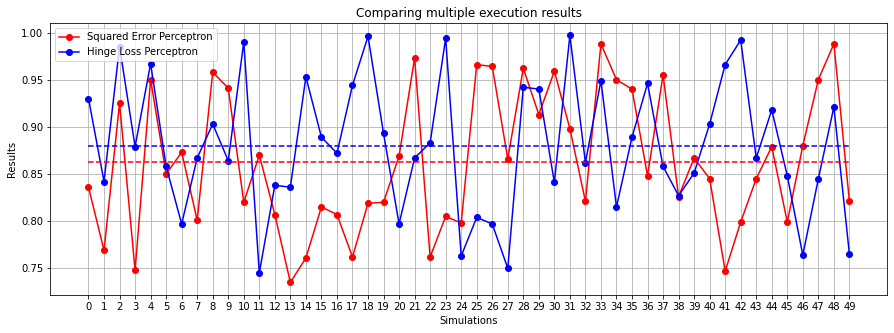

Média dos resultados:
 Squared Error scores: 86.29999999999998
.   Hinge Loss scores: 88.018


In [ ]:
new_mean_sqr, new_mean_hl = plotMultipleExecutionResults(X_test, y_test, 50, X_new, y_new)
print("Média dos resultados:")
print(f" Squared Error scores: {new_mean_sqr*100}")
print(f".   Hinge Loss scores: {new_mean_hl*100}")

# Conclusion


**3) Em qual caso você obteve a melhor acurácia, e por quê?**

Os resultados do treinamento e validação de acurácia variam muito de acordo com a distribuição da base, por conta da forma como as duas funções de custo lidam com os erros. Das várias vezes que os testes foram executados, em algumas distribuições, a função quadrátida obteve resultados melhores e em outros, resultados abaixo do Hinge Loss. Na maioria das vezes com valores bem próximos

Os melhores resultados do Hinge Loss foram obtidos em situações em que a distribuição dos dados apresentavam casos mais próximos ao hiperplano. Nesses casos, a forma como o Hinge Loss considera os pesos de erro dos pontos próximos à margem de decisão o torna mais preciso na identificação e classificação. Essa característica torna o limiar de decisão do Hinge Loss um pouco mais apurado. Já o Squared Error pode se perder nesses casos e classificar todos esse pontos mais próximos da mesma forma.

**4) Em qual caso você acha que a classificação dos mesmos 1000 pontos de teste não será significativamente diferente se o algoritmo for treinado com 20 pontos diferentes, também gerados aleatoriamente?**

A expectativa era de que o Hinge Loss tivesse um impacto mais significativo que o Squared Error, por ter um limiar de decisão mais apurado, poderia sofrer com um possível overfit quando mudasse a base de treinamento. Porém, o Squared Error apresentou um impacto maior por ter maior dificuldade nesses pontos mais ambíguos, que estão mais presentes em uma base com mais dados.